### Set standard imports

In [1]:
import matplotlib,lmfit
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import KiMoPack.plot_func as pf
from importlib import reload
reload(pf)
import import_library as il
reload(il)


Plot_func version 7.11.3
was imported from path:
 C:\Users\jensu\anaconda3\Lib\site-packages\KiMoPack
The current working folder is:
 c:\Users\jensu\Dropbox\coding\github\KiMoPack\Workflow_tools
Plot_func version 7.11.3
was imported from path:
 C:\Users\jensu\anaconda3\Lib\site-packages\KiMoPack
The current working folder is:
 c:\Users\jensu\Dropbox\coding\github\KiMoPack\Workflow_tools


<module 'import_library' from 'c:\\Users\\jensu\\Dropbox\\coding\\github\\KiMoPack\\Workflow_tools\\import_library.py'>

In [2]:
ta=pf.TA('gui',conversion_function=il.cor_streak_lund)
#ta=pf.TA('recent',conversion_function=il.cor_streak_lund)
#ta=pf.TA('FeCM02-266nm-4mw-QB390-t6-G63-w450-s150-556ms-E100.dat',conversion_function=il.streak_Lund,path='Data') #use 

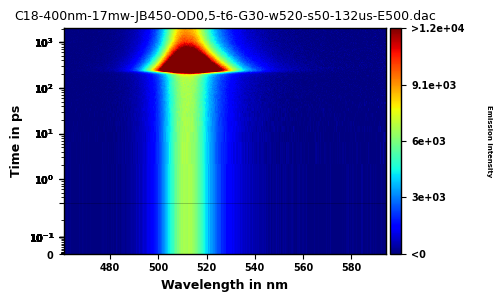

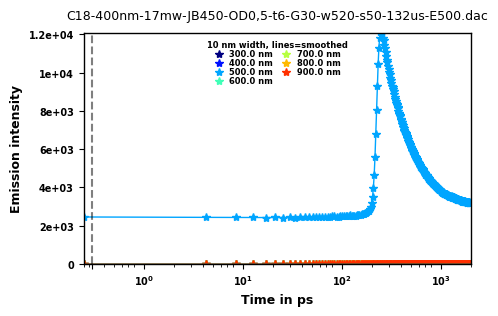

In [3]:
# Coarse adjustment
ta.intensity_range=[0,ta.ds.mean().max()]
if 0: # set to 1 for adjusting the zero point with a GUI
    %matplotlib tk
    ta.timelimits=[ta.ds.index.values.min(),ta.ds.index.values.max()]
    ta.Cor_Chirp(shown_window=ta.timelimits,just_shift=True,cmap=pf.cm.jet)
    if 0: # set to 1 for fine adjustment
        shown_window=np.array([-50,50])+ta.fitcoeff[-1]
        ta.Man_Chirp(shown_window=shown_window,just_shift=True,cmap=pf.cm.jet)
else: #use a manual plot to select t0
    %matplotlib inline
    pf.halfsize=True
    pf.changefonts()
    ta.Plot_RAW([0,1])
    t0=206
    ta.Cor_Chirp(fitcoeff=[0,0,0,0,t0])

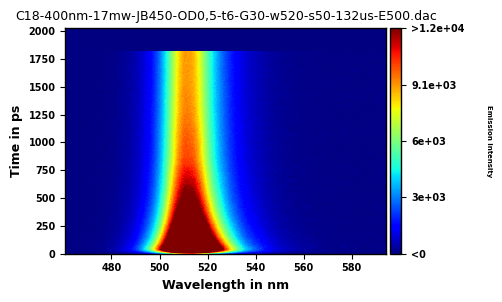

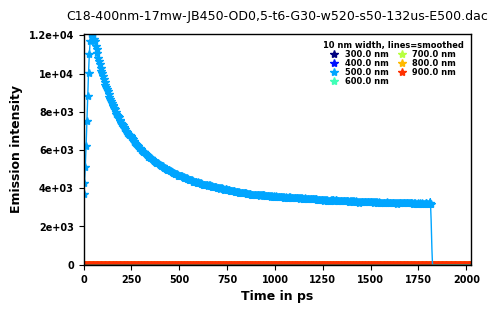

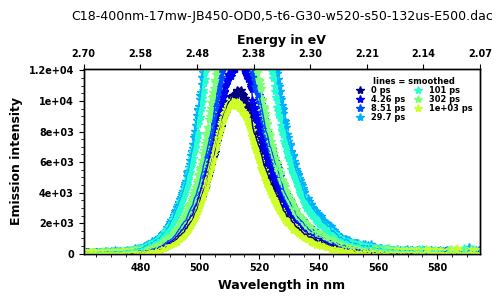

In [4]:
plt.close('all')
#ta.bordercut=[390,480]
#ta.rel_wave=[400,410,420,460,480]
#ta.rel_time=[250,600,750,1000,1750]
#ta.timelimits=[1,1400]
#ta.wave_nm_bin=None
#ta.wavelength_bin=20
#ta.log_scale=True
#ta.intensity_range=[2000,40000]
ta.Plot_RAW(range(3),scale_type='linear')

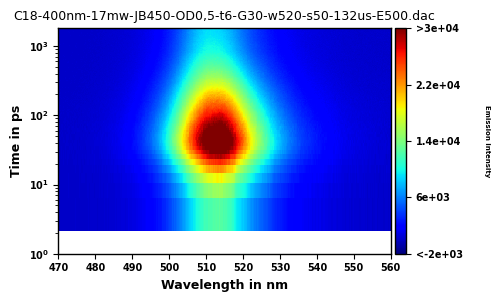

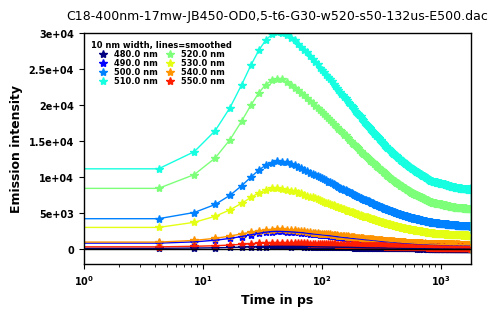

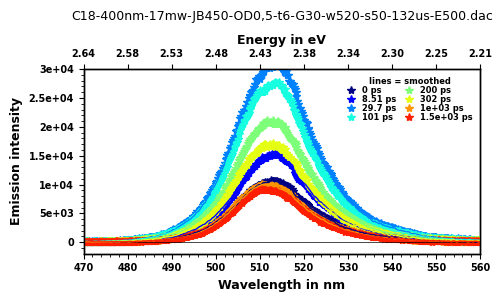

In [5]:
plt.close('all')
#ta.Background(uplimit=5,lowlimit=-100)
ta.rel_wave=np.arange(480,560,10)#[400,410,420,460,480]
ta.bordercut=[470,560]
ta.rel_time=[-10,10,30,100,200,300,1000,1500]
ta.timelimits=[1,1810]
#ta.wave_nm_bin=None
ta.wavelength_bin=10
ta.log_scale=False
ta.intensity_range=[-2e3,3e4]
ta.Plot_RAW(range(3),scale_type='log')

### Perform fast fitting using independent exponential decay (first order)

Optimizing, after the starting error the new error values will be displayed every 30s
we use adaptive mode for nelder

Fit Results:
Model Used: exponential

The minimum error is:1.63428135e+09
The minimum R2-value is:9.99614153e-01

In Rates

+------------+------------+--------------+--------+---------+-------+--------+
|            |      value |   init_value | vary   |     min |   max | expr   |
+============+============+==============+========+=========+=======+========+
| k0         |  0.01      |        0.1   | True   |    0.01 |   inf |        |
+------------+------------+--------------+--------+---------+-------+--------+
| k1         |  0.0029646 |        0.002 | True   |    0    |   inf |        |
+------------+------------+--------------+--------+---------+-------+--------+
| t0         | -5.96647   |        0.28  | True   | -inf    |   inf |        |
+------------+------------+--------------+--------+---------+-------+--------+
| resolution | 25.0606    |       67     | Tru

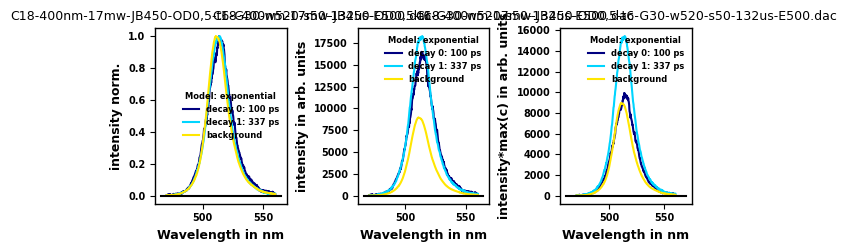

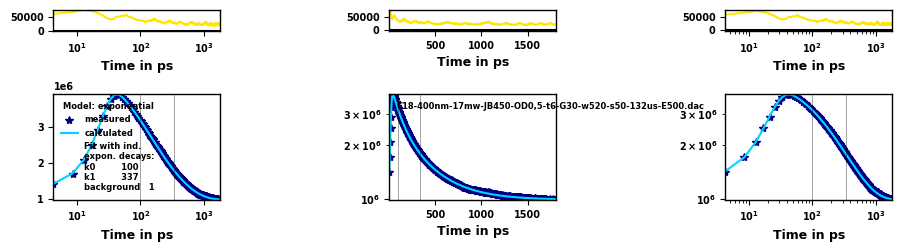

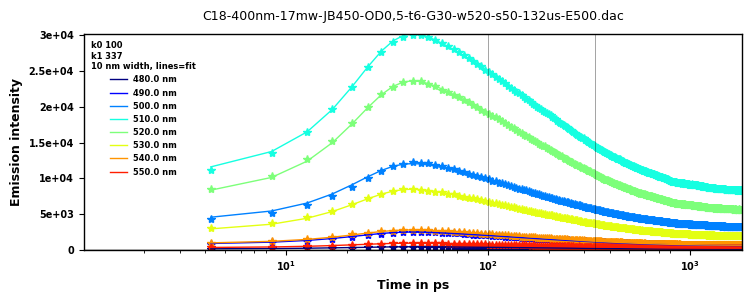

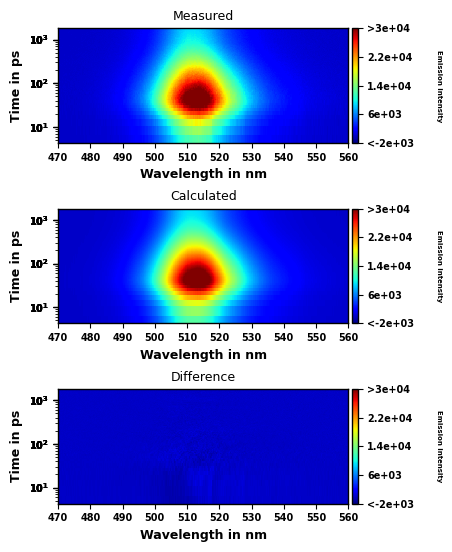

In [6]:
plt.close('all')                       # Close old spectra
ta.mod='exponential'                   # Choose the model 
par=lmfit.Parameters()                 # create empty parameter object
par.add('k0',value=1/10,vary=True,min=1/100)      # Add second rate component
par.add('k1',value=1/500,vary=True)   # Add one rate component
par.add('t0',value=0.28,vary=True) # Allow the arrival time to adjust (for all)
par.add('resolution',value=67,vary=True)       # Allow the instrument response to adjust (for all)
#par.add('infinite')                      # Keyword for an non decaying component
par.add('background')                    # Keyword to fit the Background 
ta.par=par                               # write parameter object 
ta.Fit_Global(fit_chirp=False)           # trigger fitting

ta.error_matrix_amplification=1
ta.Plot_fit_output([0,1,2,4])            # plot the fit output

In [ ]:
pf.halfsize=False
pf.changefonts()
ta.Save_Powerpoint()
pf.halfsize=True
pf.changefonts()

### Perform Error analysis and calculate confidence interval

In [102]:
ta.par=ta.par_fit #write the best results back as starting parameter
ta.Fit_Global(confidence_level=0.66)

Optimizing, after the starting error the new error values will be displayed every 30s
we use adaptive mode for nelder
Trying to find k0, lower confidence limit
Trying to find k0, upper confidence limit
Trying to find k1, lower confidence limit
Trying to find k1, upper confidence limit
Trying to find t0, lower confidence limit
Trying to find t0, upper confidence limit
Trying to find resolution, lower confidence limit
Trying to find resolution, upper confidence limit
it took 263 optimisations to get the confidence

Fit Results:
Model Used: exponential

The minimum error is:1.63428135e+09
The minimum R2-value is:9.99614153e-01

In Rates with confidence interval to level of 66.0

+------------+------------+---------------+---------------+--------------+--------+---------+-------+--------+
|            |      value |   lower_limit |   upper_limit |   init_value | vary   |     min |   max | expr   |
+============+============+===============+===============+==============+========+=========+

In [ ]:
plt.close('all')
ta.mod='consecutive'             # very quick fit using independent exponential followed by one round of sequential
ta.par=ta.par_fit                # copy fitted parameter into a new fit (e.g. different model)
ta.Fit_Global()   # The iterative chrip is best optimised using 'exponential'
ta.Plot_fit_output([0,1,2,4])     # plot the fit output